In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import warnings
import cv2
import imghdr
from random import randint
from tensorflow.keras import layers

In [2]:
#initialize the data

data_dir="C:/Univ/internship/fruits-vegetables/dataset"
train_dir = "C:/Univ/internship/fruits-vegetables/dataset/train"
test_dir = "C:/Univ/internship/fruits-vegetables/dataset/test"
num_classes = 21

print(os.listdir(os.path.join(data_dir, 'train')))

['apple', 'banana', 'beetroot', 'cabbage', 'capsicum', 'carrot', 'cucumber', 'grapes', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'pear', 'pineapple', 'pomegranate', 'potato', 'raddish', 'tomato', 'watermelon']


In [3]:
def convert_images_to_arrays(data_dir, target_size=(32, 32)):
    images = []
    labels = []

    for label, class_name in enumerate(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Read and resize the image using OpenCV
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed
            image = cv2.resize(image, target_size)

            images.append(image)
            labels.append(label)

    return np.array(images), np.array(labels)


# Convert images to NumPy arrays for training and testing sets
train_images, train_labels = convert_images_to_arrays(os.path.join(data_dir, 'train'))
test_images, test_labels = convert_images_to_arrays(os.path.join(data_dir, 'test'))

# Print information about the dataset
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Number of classes:", len(np.unique(train_labels)))

print("testing images shape:", test_images.shape)
print("testing labels shape:", test_labels.shape)
print("Number of classes:", len(np.unique(test_labels)))


Training images shape: (3212, 32, 32, 3)
Training labels shape: (3212,)
Number of classes: 21
testing images shape: (210, 32, 32, 3)
testing labels shape: (210,)
Number of classes: 21


In [4]:
train_images[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
test_images[0]

array([[[255, 255, 255],
        [249, 249, 249],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

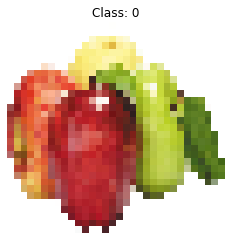

In [6]:
# Assuming train_images[0] is a single image array
image_to_show = train_images[0]

# Display the image
plt.imshow(image_to_show)
plt.title(f"Class: {train_labels[0]}")  # Assuming train_labels[0] is the corresponding label
plt.axis('off')  # Turn off axis labels
plt.show()

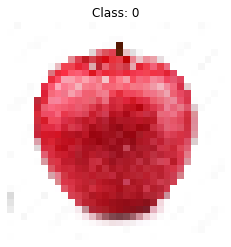

In [7]:
# Assuming train_images[0] is a single image array
image_to_show = test_images[0]

# Display the image
plt.imshow(image_to_show)
plt.title(f"Class: {test_labels[0]}")  # Assuming train_labels[0] is the corresponding label
plt.axis('off')  # Turn off axis labels
plt.show()

In [8]:
train_images[14]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [106, 183,  71],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [106, 183,  71],
        [105, 182,  74],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [106, 183,  71],
        [105, 182,  74],
        [  0,   0,   0]]

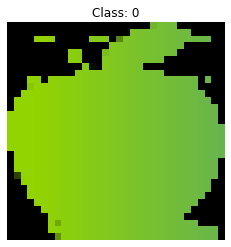

In [9]:
# Assuming train_images[0] is a single image array
image_to_show = train_images[14]

# Display the image
plt.imshow(image_to_show)
plt.title(f"Class: {train_labels[14]}")  # Assuming train_labels[0] is the corresponding label
plt.axis('off')  # Turn off axis labels
plt.show()

In [10]:
# Choose the number of random labels you want to display
num_random_labels = 20

# Get a list of random labels
random_labels = random.sample(list(train_labels), num_random_labels)

# Display the list of random labels
print(random_labels)


[9, 5, 1, 12, 8, 18, 20, 7, 13, 20, 18, 18, 9, 18, 18, 4, 11, 5, 12, 4]


In [11]:
lookup=['apple',
'banana',
'beetroot',
'cabbage',
'capsicum',
'carrot',
'cucumber',
'grapes',
'kiwi',
'lemon',
'lettuce',
'mango',
'onion',
'orange',
'pear',
'pineapple',
'pomegranate',
'potato',
'raddish',
'tomato',
'watermelon']

In [12]:
def show_img(images, labels, n_images):
    
    random_int = randint(0, labels.shape[0] - n_images)
    
    imgs, labels = images[random_int : random_int + n_images], \
        labels[random_int : random_int +  n_images]
    
    _, figs = plt.subplots(1, n_images, figsize=(n_images * 3, 3))

    for fig, img, label in zip(figs, imgs, labels):
        fig.imshow(img)
        ax = fig.axes
        
        ax.set_title(lookup[int(label)])
        
        ax.title.set_fontsize(20)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Label: 14, Class Name: pear
Label: 15, Class Name: pineapple
Label: 14, Class Name: pear
Label: 15, Class Name: pineapple
Label: 16, Class Name: pomegranate


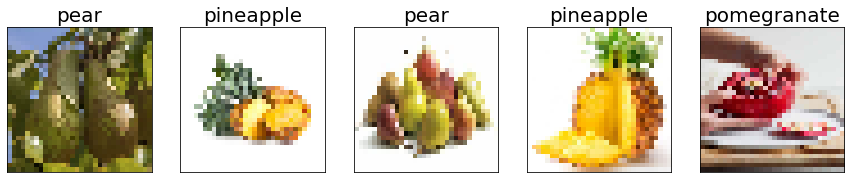

In [13]:
def show_random_images(images, labels, n_images, lookup):
    _, figs = plt.subplots(1, n_images, figsize=(n_images * 3, 3))

    for fig in figs:
        random_index = randint(0, len(images) - 1)
        img = images[random_index]
        label = labels[random_index]
        
        ax = fig.axes
        ax.imshow(img)
        
        # Convert label to integer explicitly to handle any type mismatch
        label_int = int(label)
        class_name = lookup[label_int] if 0 <= label_int < len(lookup) else 'Unknown'
        ax.set_title(class_name)
        
        ax.title.set_fontsize(20)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Print label, class_name, and original lookup for debugging
        print(f"Label: {label_int}, Class Name: {class_name}")

# Example usage
show_random_images(train_images, train_labels, 5, lookup)
plt.show()

In [14]:
i = 0

for img, label in zip(train_images, train_labels):
    
    path = train_dir + str(lookup[int(label)])
    
    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
    
    i += 1
    cv2.waitKey(0)

In [15]:
i = 0

for img, label in zip(test_images, test_labels):

    path = test_dir + str(lookup[int(label)])
    
    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
 
    i += 1
    
    cv2.waitKey(0)

In [16]:
train_image_generator = ImageDataGenerator(rescale=1./255)

test_image_generator = ImageDataGenerator(rescale=1./255)

In [25]:
batch_size = 32

In [26]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(32, 32))

Found 3212 images belonging to 21 classes.


In [27]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=test_dir,
                                                         shuffle=True,
                                                         target_size=(32, 32))

Found 210 images belonging to 21 classes.


In [28]:
sample_batch = next(train_data_gen)

sample_batch[0].shape

c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(32, 32, 32, 3)

In [29]:
conv_model = tf.keras.models.Sequential([

    layers.Conv2D(16, (3, 3), padding='same', activation='relu', 
                  input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(21, activation='softmax')

])

In [30]:
conv_model.compile(optimizer='adam',
                   loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [31]:
training_hist = conv_model.fit(train_data_gen,
                               epochs=15,
                               steps_per_epoch=len(train_images) // batch_size,
                               validation_data=test_data_gen,
                               validation_steps=len(test_images) // batch_size)

Epoch 1/15


c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


100/100 [==============================] - 75s 736ms/step - loss: 2.7426 - accuracy: 0.1340 - val_loss: 2.3419 - val_accuracy: 0.2865
Epoch 2/15
100/100 [==============================] - 77s 765ms/step - loss: 2.1711 - accuracy: 0.3047 - val_loss: 2.2352 - val_accuracy: 0.2969
Epoch 3/15
100/100 [==============================] - 76s 758ms/step - loss: 1.9044 - accuracy: 0.3720 - val_loss: 1.7895 - val_accuracy: 0.4167
Epoch 4/15
100/100 [==============================] - 76s 765ms/step - loss: 1.7049 - accuracy: 0.4305 - val_loss: 1.6938 - val_accuracy: 0.4062
Epoch 5/15
100/100 [==============================] - 78s 776ms/step - loss: 1.5953 - accuracy: 0.4862 - val_loss: 1.5393 - val_accuracy: 0.4844
Epoch 6/15
100/100 [==============================] - 81s 808ms/step - loss: 1.4262 - accuracy: 0.5396 - val_loss: 1.6668 - val_accuracy: 0.4479
Epoch 7/15
100/100 [==============================] - 78s 781ms/step - loss: 1.2648 - accuracy: 0.5896 - val_loss: 1.3857 - val_accuracy: 0.5

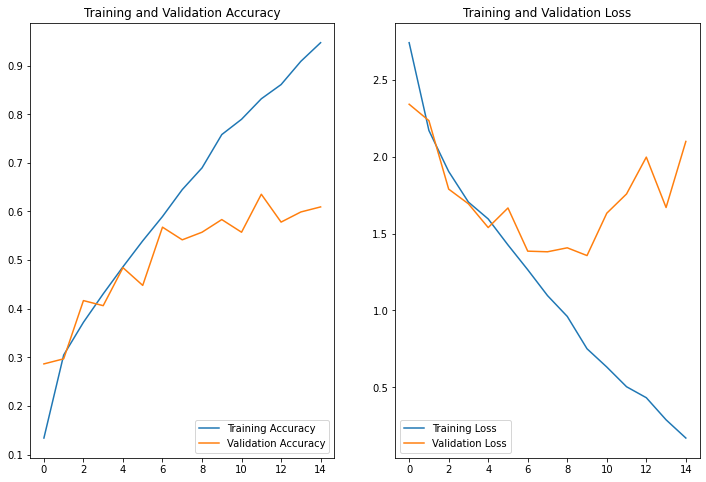

In [32]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='lower left')

plt.title('Training and Validation Loss')
plt.show()

In [33]:
test_images[0].shape

(32, 32, 3)

In [34]:
def perform_test(model, img, label):
    plt.imshow(img)
    
    test_img = np.expand_dims(img, axis=0)
    result = model.predict(test_img)
    
    print('Actual label: ', lookup[int(label)])
    print('Predicted label: ', lookup[np.argmax(result)])

1/1 [==============================] - 0s 134ms/step
Actual label:  apple
Predicted label:  apple


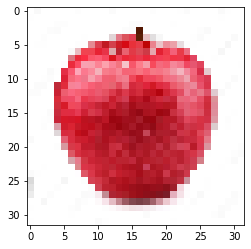

In [36]:
perform_test(conv_model, test_images[0], test_labels[0])

1/1 [==============================] - 0s 41ms/step
Actual label:  apple
Predicted label:  apple


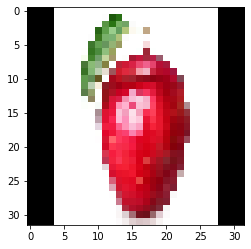

In [37]:
perform_test(conv_model, test_images[1], test_labels[1])

1/1 [==============================] - 0s 35ms/step
Actual label:  watermelon
Predicted label:  tomato


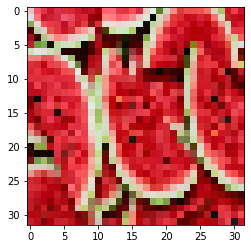

In [39]:
perform_test(conv_model, test_images[200], test_labels[200])

1/1 [==============================] - 0s 27ms/step
Actual label:  lettuce
Predicted label:  lettuce


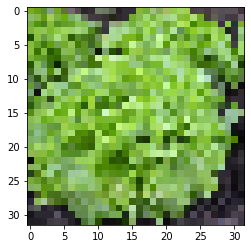

In [40]:
perform_test(conv_model, test_images[100], test_labels[100])

In [46]:
# Save the model in HDF5 format
conv_model.save("model.h5")

# Load the model from the saved file
loaded_model = tf.keras.models.load_model("model.h5")


c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
